In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.stats as st
import seaborn as sns

from experiment.v1dd_client import V1DDClient
from experiment.v1dd_ophys_session import V1DDOPhysSession
from stimulus_analysis.drifting_gratings import DriftingGratings
from stimulus_analysis import fit_utils
import analysis_tools as at

%load_ext autoreload
%autoreload 2

In [2]:
# windows
# base_folder = r"\\allen\programs\mindscope\workgroups\surround\v1dd_in_vivo_new_segmentation\data"

# # linux and mac
# base_folder = "/allen/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"
# base_folder = "/Volumes/programs/mindscope/workgroups/surround/v1dd_in_vivo_new_segmentation/data"
base_folder = "/Users/chase/Desktop/test_v1dd_data"
# base_folder = "/Volumes/AllenDrive/v1dd/data" # Chase's external hard drive
client = V1DDClient(base_folder)

In [3]:
mouse = 409828
col, vol = 1, 3
sess = client.load_ophys_session(mouse=mouse, column=col, volume=vol)
# Alternatively
# sess = client.load_ophys_session(session_id="M409828_13")
print(f"Loaded ophys session {sess.get_session_id()} (mouse {sess.get_mouse_id()}, column {sess.get_column_id()}, volume {sess.get_volume_id()})")

Loaded ophys session M409828_13 (mouse 409828, column 1, volume 3)


In [4]:
plane = sess.get_planes()[0]
print(f"Analyzing plane {plane}")
dgw = DriftingGratings(sess, plane, dg_type="windowed")
dgf = DriftingGratings(sess, plane, dg_type="full")

Analyzing plane 1


In [5]:
dgwm = dgw.metrics.loc[dgw.metrics.is_valid]
dgwm.head(10)

Loading DG-windowed response metrics for session M409828_13, plane 1...


,pref_response,pref_dir,pref_sf,pref_dir_idx,pref_sf_idx,pref_dir_mean,z_score,response_p,osi,gosi,...,vonmises_1_peak_amp,vonmises_1_r2_score,norm_dir_responses,is_valid,pref_ori,chisq_response_p,null_dist_multi_mean,null_dist_multi_std,null_dist_single_mean,null_dist_single_std
0,0.001336,90,0.04,3,0,26.679055,3.910324,0.0002,0.404287,0.09386,...,0.000467,0.278347,"[0.25015017, 0.6512396, -0.04599632, 0.9891021...",True,90,0.121,0.000432,0.000231,0.000441,0.000661
1,0.001739,0,0.04,0,0,0.070415,3.8568,0.0004,0.636135,0.155637,...,0.000704,0.429437,"[1.8923771, 0.86688083, 0.99304307, 0.22574292...",True,0,0.308,0.000573,0.000302,0.000574,0.000851
2,0.000889,210,0.08,7,1,275.243489,-0.156783,0.5321,0.415835,0.199779,...,0.000396,0.039445,"[-0.24663812, -0.47465464, -0.4078789, -0.4806...",True,30,0.9,0.000966,0.000489,0.000968,0.001422
3,0.00166,120,0.04,4,0,117.169741,1.937341,0.0458,0.620734,0.265674,...,0.000793,0.180353,"[0.13654612, -0.29972097, 0.076660596, -0.1823...",True,120,0.44,0.000776,0.000456,0.000793,0.001308
4,0.001459,90,0.04,3,0,133.524609,0.977247,0.1492,0.189591,0.02125,...,0.00072,0.474962,"[1.6056216, 1.1354958, 0.77980757, 2.2687705, ...",True,90,0.532,0.000882,0.000591,0.000876,0.001655
5,0.001078,120,0.08,4,1,137.099368,1.654887,0.0584,0.574286,0.233856,...,0.000956,0.632251,"[-0.772649, -0.670156, -0.52175933, -0.772649,...",True,120,0.181,0.000566,0.000309,0.000568,0.00088
6,0.04379,0,0.08,0,1,349.161004,160.802817,0.0,0.993159,0.786891,...,0.054964,0.998568,"[8.300041, 0.7324047, 0.00484052, -0.007601554...",True,0,0.0,0.000461,0.000269,0.000454,0.000756
7,0.001729,30,0.04,1,0,42.881459,0.966939,0.1253,0.343454,0.205463,...,0.002022,0.703304,"[-0.3773661, 0.73485804, 0.5509135, 0.31599998...",True,30,0.275,0.000923,0.000834,0.000935,0.002388
8,0.006387,180,0.08,6,1,200.53603,1.866462,0.0562,0.925481,0.533833,...,0.006688,0.917248,"[-0.59482896, -0.7628895, -0.76820856, -0.7031...",True,0,0.057,0.002515,0.002075,0.002423,0.005692
9,0.006793,240,0.08,8,1,239.145525,10.521286,0.0,0.912764,0.505968,...,0.004807,0.624534,"[-0.27377403, -0.27377403, -0.21082923, -0.105...",True,60,0.11,0.000556,0.000593,0.000557,0.001736


In [6]:
dgfm = dgf.metrics.loc[dgf.metrics.is_valid]
dgfm.head(10)

Loading DG-full response metrics for session M409828_13, plane 1...


,pref_response,pref_dir,pref_sf,pref_dir_idx,pref_sf_idx,pref_dir_mean,z_score,response_p,osi,gosi,...,vonmises_1_peak_amp,vonmises_1_r2_score,norm_dir_responses,is_valid,pref_ori,chisq_response_p,null_dist_multi_mean,null_dist_multi_std,null_dist_single_mean,null_dist_single_std
0,0.001121,0,0.04,0,0,353.143101,2.936311,0.004,0.347611,0.130152,...,0.000453,0.121794,"[2.7808247, 0.0, 0.7273602, 2.1734064, 0.48554...",True,0,0.201,0.000433,0.000234,0.000438,0.000661
1,0.001282,0,0.04,0,0,308.062014,2.371248,0.0149,0.416388,0.231347,...,0.000543,0.082608,"[0.9679252, -0.00070116983, -0.20061986, -0.17...",True,0,0.419,0.000569,0.0003,0.000584,0.000852
2,0.000934,0,0.04,0,0,22.753584,-0.065781,0.4909,0.3034,0.074925,...,0.000453,0.055566,"[-0.24269153, -0.7820539, -0.48648703, -0.4819...",True,0,0.524,0.000967,0.000497,0.000961,0.001401
3,0.00226,120,0.08,4,1,109.464814,3.26144,0.005,0.500294,0.175276,...,0.001913,0.604705,"[0.0025737337, 0.387579, 0.37911457, 0.4702797...",True,120,0.029,0.000775,0.000455,0.000769,0.001302
4,0.001457,300,0.04,10,0,205.366409,0.962776,0.1536,0.581319,0.303762,...,0.000825,0.253337,"[0.5747937, -0.124260575, -0.35757092, 0.72359...",True,120,0.043,0.000885,0.000593,0.000884,0.00167
5,0.001282,0,0.04,0,0,358.113333,2.330467,0.0201,0.477469,0.015371,...,0.000729,0.500904,"[0.93107593, -0.035488654, 0.37094465, -0.1565...",True,0,0.371,0.00056,0.00031,0.000571,0.00088
6,0.019338,330,0.08,11,1,338.958318,70.235537,0.0,0.978587,0.746221,...,0.020614,0.982365,"[5.1177354, 0.25955465, -0.06753954, 0.0784749...",True,150,0.0,0.00046,0.000269,0.000451,0.000758
7,0.001171,270,0.04,9,0,312.760573,0.29552,0.2456,0.419911,0.227503,...,0.000877,0.604889,"[0.10013875, 0.08425655, 0.052139647, 0.209915...",True,90,0.292,0.000929,0.000821,0.000941,0.002342
8,0.000976,300,0.04,10,0,356.704327,-0.752614,0.7194,0.610764,0.272118,...,0.000848,0.52367,"[0.35528105, -0.24947827, 0.1284198, 0.5168639...",True,120,0.096,0.002505,0.002031,0.00248,0.005765
9,0.000967,0,0.04,0,0,337.74933,0.723072,0.1048,0.779708,0.222579,...,0.000523,0.183297,"[3.1375434, 0.6263429, 1.1948316, 0.7767289, 0...",True,0,0.028,0.000543,0.000586,0.000555,0.001731


In [7]:
dgwm.index[dgwm.frac_responsive_trials >= 0.5]

Int64Index([  6,  14,  16,  17,  19,  26,  27,  29,  30,  33,  37,  41,  57,
             64,  66,  72,  73,  77,  82,  84,  87,  99, 102, 103, 104, 105,
            109, 112, 113, 114, 118, 125, 133, 142, 143, 147, 148, 153, 155,
            169, 170, 172, 176, 180, 181, 182, 184, 186, 192, 199, 201, 202,
            204, 213, 215, 217, 223, 225, 226, 229, 236, 238, 244, 246, 247,
            252, 256, 261, 263, 268, 287, 293, 301, 302, 307, 322, 327, 329,
            330, 331, 339, 342, 344, 345, 348, 369, 381, 384, 411, 421, 424,
            426, 438, 456, 460, 544, 579],
           dtype='int64')

DGW: (0.9627030402607412, 62.269623892492376, 0.011390453634634737)
DGF: (0.7354653415495724, 72.54551699022757, 0.0010192645363178282)
Tuning SSI: 0.83573123542747


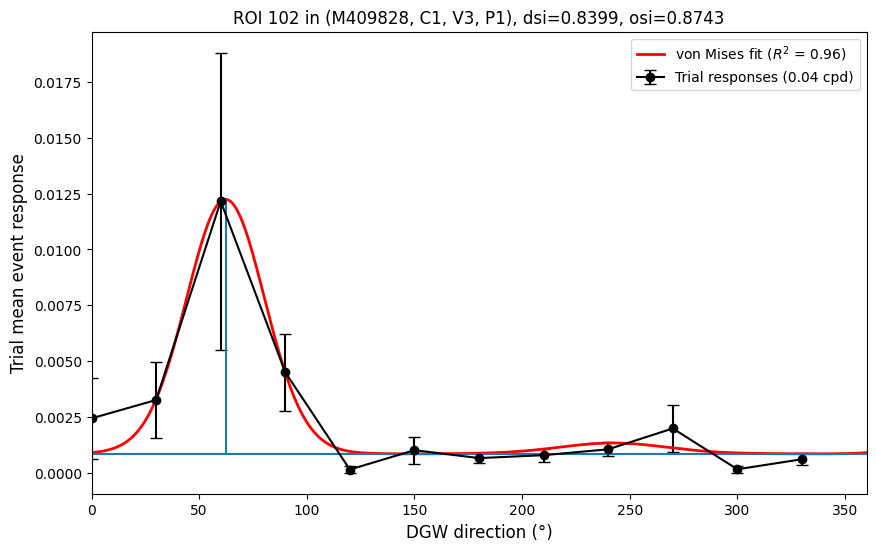

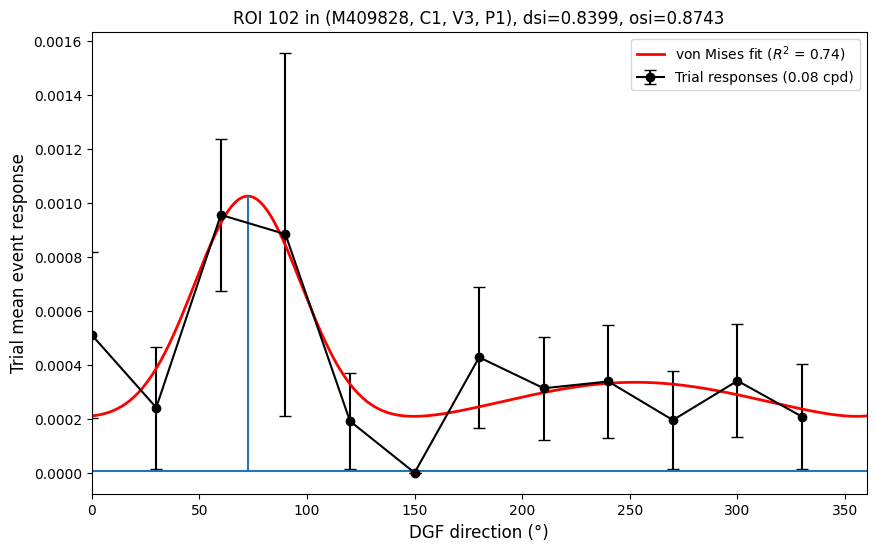

In [8]:
def fit_tuning_curve(dg, roi, pref_sf_idx=None, make_plot=False):
    if pref_sf_idx is None:
        pref_sf_idx = dg.metrics.at[roi, "pref_sf_idx"]

    x = []
    y = []
    if make_plot: y_err = []

    for dir_idx, dir in enumerate(dg.dir_list):
        responses = dg.trial_responses[roi, dir_idx, pref_sf_idx, :]
        responses = responses[~np.isnan(responses)] # Remove nan responses

        mean_response = responses.mean()

        # OPTION 1: Train on trial mean data points
        x.append(dir)
        y.append(mean_response)
        if make_plot: y_err.append(responses.std() / np.sqrt(len(responses)))

        # OPTION 2: Train on individual trials data points
        # for r in responses:
        #     x.append(dir)
        #     y.append(r)

    opt_params = fit_utils.vonmises_two_peak_fit(x, y)

    if opt_params is None:
        print(f"WARN: Failed to fit DG{dg.dg_type[0].upper()} tuning curve to ROI {roi}")
        return None

    y_pred = fit_utils.vonmises_two_peak(x, *opt_params)
    r2 = fit_utils.r2_score(y, y_pred)
    dir, scale = fit_utils.vonmises_two_peak_get_pref_dir_and_amplitude(opt_params)

    if make_plot:
        fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")
        ax.errorbar(x, y, yerr=y_err, color="black", marker="o", capsize=4, label=f"Trial responses ({dg.sf_list[pref_sf_idx]:.2} cpd)")
        # ax.scatter(x, y, color="black", marker="o", label=f"Trial responses ({dgw.sf_list[pref_sf_idx]:.2} cpd)")
        xx = np.arange(0, 361)
        ax.plot(xx, fit_utils.vonmises_two_peak(xx, *opt_params), color="red", linewidth=2, label=f"von Mises fit ($R^2$ = {r2:.2f})")

        ax.vlines(x=dir, ymin=opt_params[5], ymax=opt_params[5]+scale)
        ax.axhline(opt_params[5])

        ax.set_xlim(xx.min(), xx.max())
        ax.legend(fontsize=10)
        ax.set_xlabel(f"DG{dg.dg_type[0].upper()} direction (°)", fontsize=12)
        ax.set_ylabel("Trial mean event response", fontsize=12)
        dsi = dgw.metrics.loc[roi, "dsi"]
        osi = dgw.metrics.loc[roi, "osi"]
        ax.set_title(f"ROI {roi} in {'(M{}, C{}, V{}, P{})'.format(*sess.get_mouse_column_volume(), plane)}, dsi={dsi:.4f}, osi={osi:.4f}")

    return r2, dir, scale

    # Leave-one-out cross validation
    # cv_mses = []
    # cv_r2s = []

    # for cv_iter in range(20):
    #     x_train = []
    #     y_train = []
    #     y_test = []

    #     for dir_idx, dir in enumerate(dgw.dir_list):
    #         responses = dgw.trial_responses[roi, dir_idx, pref_sf_idx, :]
    #         responses = responses[~np.isnan(responses)] # Remove nan responses

    #         # Leave out a random index for testing
    #         test_idx = np.random.randint(len(responses))

    #         x_train.append(dir)
    #         y_train.append(np.mean(np.delete(responses, test_idx)))
    #         y_test.append(responses[test_idx])
        
    #     # Fit the model
    #     params = vonmises_fit(x_train, y_train)

    #     if params is None:
    #         print(f"WARN: No params found during CV iter {cv_iter}")
    #         continue

    #     y_pred = f_vonmises_2(x_train, *opt_params_2)
    #     test_mse = np.mean(np.square(y_pred - y_test))

    #     cv_mses.append(test_mse)
    #     cv_r2s.append(vonmises_r2_score(y_test, y_pred))

    #     ax.plot(xx, f_vonmises_2(xx, *params), color="gray", linewidth=1, alpha=0.5, linestyle="dashed")

    # print("CV MSE:", np.mean(cv_mses))
    # print("CV R^2:", np.mean(cv_r2s))

roi = dgwm.index[dgwm.frac_responsive_trials >= 0.5][22]
dgw_fit = fit_tuning_curve(dgw, roi, make_plot=True)
dgf_fit = fit_tuning_curve(dgf, roi, make_plot=True)

print("DGW:", dgw_fit)
print("DGF:", dgf_fit)
print("Tuning SSI:", (dgw_fit[2]-dgf_fit[2]) / (dgw_fit[2]+dgf_fit[2]))

In [198]:
responsive_rois = dgwm.index[dgwm.frac_responsive_trials >= 0.5].values
fit_info = pd.DataFrame(index=responsive_rois)

for roi in responsive_rois:
    pref_sf_idx = dgwm.at[roi, "pref_sf_idx"]
    pref_dir = dgwm.at[roi, "pref_dir"]
    x = []
    y = []
    # y_err = []

    for dir_idx, dir in enumerate(dgw.dir_list):
        responses = dgw.trial_responses[roi, dir_idx, pref_sf_idx, :]
        responses = responses[~np.isnan(responses)] # Remove nan responses
        mean_response = responses.mean()

        x.append(dir)
        y.append(mean_response)
        # sem = responses.std() / np.sqrt(len(responses))
        # y_err.append(sem)

    opt_params = vonmises_fit(x, y) # Seed the fit with the previous fit

    if opt_params is None:
        print("WARN: Failed to fit ROI", roi)
        continue

    y_pred_full = f_vonmises_2(x, *opt_params)
    r2 = vonmises_r2_score(y, y_pred_full)
    fit_info.at[roi, "r2_score"] = r2
    # print(f"ROI {roi} R^2 score = {r2:.2f}")

    if roi < 20 and False:
        fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")
        ax.errorbar(x, y, yerr=y_err, color="black", marker="o", capsize=4, label=f"Trial responses ({dgw.sf_list[pref_sf_idx]:.2} cpd)")
        # ax.scatter(x, y, color="black", marker="o", label=f"Trial responses ({dgw.sf_list[pref_sf_idx]:.2} cpd)")
        xx = np.arange(0, 361)
        ax.plot(xx, f_vonmises_2(xx, *opt_params), color="red", linewidth=2, label=f"von Mises fit ($R^2$ = {r2:.2f})")

        dir, scale = vonmises_fit_get_dir_and_height(opt_params)
        ax.vlines(x=dir, ymin=opt_params[5], ymax=opt_params[5]+scale)
        ax.axhline(opt_params[5])

        ax.set_xlim(xx.min(), xx.max())
        ax.legend(fontsize=10)
        ax.set_xlabel("DGW direction (°)", fontsize=12)
        ax.set_ylabel("Trial mean event response", fontsize=12)
        dgw_dsi = dgw.metrics.loc[roi, "dsi"]
        dgw_osi = dgw.metrics.loc[roi, "osi"]
        ax.set_title(f"ROI {roi} in {'(M{}, C{}, V{}, P{})'.format(*sess.get_mouse_column_volume(), plane)}, dgw-dsi={dgw_dsi:.4f}, dgw-osi={dgw_osi:.4f}")

In [10]:
dgwm.columns

Index(['pref_response', 'pref_dir', 'pref_sf', 'pref_dir_idx', 'pref_sf_idx',
       'pref_dir_mean', 'z_score', 'response_p', 'osi', 'gosi', 'dsi',
       'frac_responsive_trials', 'lifetime_sparseness', 'p_trial_responses',
       'sig_trial_responses', 'vonmises_param_0', 'vonmises_param_1',
       'vonmises_param_2', 'vonmises_param_3', 'vonmises_param_4',
       'vonmises_param_5', 'vonmises_pref_dir', 'vonmises_peak_amp',
       'vonmises_r2_score', 'norm_dir_responses', 'is_valid', 'pref_ori',
       'chisq_response_p', 'null_dist_multi_mean', 'null_dist_multi_std',
       'null_dist_single_mean', 'null_dist_single_std'],
      dtype='object')

In [15]:
print(f"There are {np.count_nonzero(dgwm[dgwm.frac_responsive_trials >= 0.5].vonmises_param_0.isna())} bad fits")

There are 0 bad fits


(0.0, 1.0)

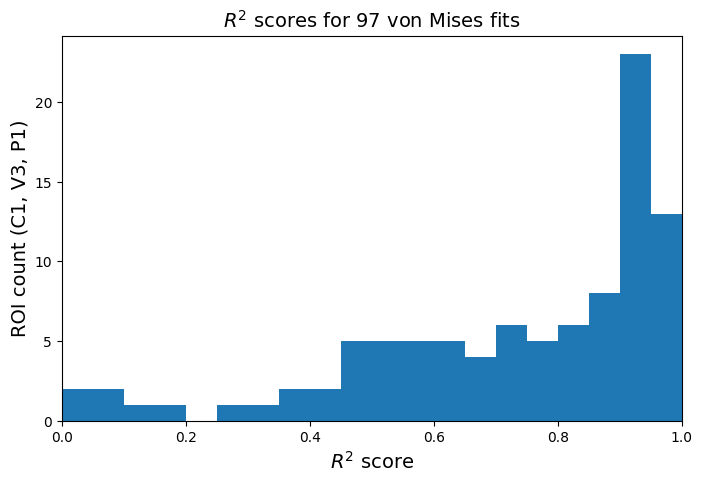

In [14]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(dgwm.vonmises_r2_score, bins=np.arange(0, 1.05, 0.05))
ax.set_xlabel("$R^2$ score", fontsize=14)
ax.set_ylabel("ROI count (C1, V3, P1)", fontsize=14)
ax.set_title(f"$R^2$ scores for {np.count_nonzero(~dgwm.vonmises_r2_score.isna())} von Mises fits", fontsize=14)
ax.set_xlim(0, 1)

In [19]:
dgwm.loc[150:158]

,pref_response,pref_dir,pref_sf,pref_dir_idx,pref_sf_idx,pref_dir_mean,z_score,response_p,osi,gosi,...,vonmises_1_pref_dir,vonmises_1_peak_amp,vonmises_1_r2_score,is_valid,pref_ori,chisq_response_p,null_dist_multi_mean,null_dist_multi_std,null_dist_single_mean,null_dist_single_std
150,0.001527,180,0.04,6,0,221.869849,1.33066,0.0625,0.326511,0.103441,...,51.101447,0.000654,0.538741,True,0,0.26,0.000641,0.000665,0.000637,0.001834
151,0.004746,180,0.04,6,0,187.686858,12.034526,0.0,0.766107,0.299686,...,126.249187,0.001195,0.255606,True,0,0.344,0.000637,0.000341,0.000634,0.000965
152,0.000974,30,0.08,1,1,54.696827,2.640113,0.009,0.362407,0.07199,...,44.040921,0.000698,0.402553,True,30,0.841,0.000385,0.000223,0.000376,0.000627
153,0.008192,150,0.04,5,0,151.346092,20.140115,0.0,0.819286,0.446191,...,136.497176,0.006708,0.986441,True,150,0.0,0.000667,0.000374,0.00067,0.001034
154,0.001283,330,0.04,11,0,342.769387,2.052013,0.0393,0.394873,0.191078,...,313.68256,0.000543,0.091359,True,150,0.331,0.000558,0.000353,0.000567,0.000989
155,0.002815,150,0.08,5,1,138.23933,10.338601,0.0,0.622781,0.388241,...,155.520843,0.00256,0.917316,True,150,0.0,0.000424,0.000231,0.000431,0.000649
156,0.001206,90,0.08,3,1,87.83693,2.507859,0.0269,0.578736,0.172239,...,78.463105,0.000822,0.378157,True,90,0.695,0.000469,0.000294,0.000467,0.000827
157,0.001301,180,0.04,6,0,268.011734,2.719552,0.0088,0.609269,0.265975,...,300.817734,0.000817,0.476439,True,0,0.157,0.000509,0.000291,0.000519,0.000832
158,0.000852,210,0.04,7,0,271.137757,1.883575,0.0374,0.092755,0.015056,...,26.837918,0.000531,0.131974,True,30,0.516,0.00044,0.000219,0.000429,0.00062


In [24]:
dgf.metrics.is_valid[155]

False

In [20]:
dgfm.loc[150:158]

,pref_response,pref_dir,pref_sf,pref_dir_idx,pref_sf_idx,pref_dir_mean,z_score,response_p,osi,gosi,...,vonmises_1_pref_dir,vonmises_1_peak_amp,vonmises_1_r2_score,is_valid,pref_ori,chisq_response_p,null_dist_multi_mean,null_dist_multi_std,null_dist_single_mean,null_dist_single_std
150,0.000918,240,0.04,8,0,294.516154,0.434304,0.1397,0.247929,0.156257,...,69.450749,0.000574,0.287366,True,60,0.837,0.000635,0.000652,0.000631,0.001796
151,0.002209,330,0.04,11,0,125.43004,4.562798,0.0,0.588645,0.28997,...,316.365019,0.000463,0.033142,True,150,0.005,0.000634,0.000345,0.000637,0.000973
152,0.000865,330,0.04,11,0,0.19561,2.145251,0.023,0.271148,0.186518,...,243.516615,0.000454,0.027726,True,150,0.796,0.000386,0.000223,0.000391,0.000634
153,0.002135,120,0.04,4,0,117.625091,3.971439,0.0005,0.900683,0.285979,...,140.884947,0.000958,0.270326,True,120,0.001,0.000672,0.000368,0.000654,0.00103
154,0.002676,30,0.04,1,0,12.00252,6.011328,0.0001,0.601296,0.168181,...,93.219208,0.000595,0.529307,True,30,0.452,0.000566,0.000351,0.000572,0.001006
156,0.001658,180,0.08,6,1,214.902628,4.000752,0.0022,0.504285,0.25261,...,183.092747,0.001536,0.785214,True,0,0.353,0.000471,0.000297,0.000476,0.00083
157,0.001269,0,0.04,0,0,351.708558,2.557683,0.0126,0.457594,0.181948,...,155.238038,0.000813,0.309197,True,0,0.253,0.000514,0.000295,0.00052,0.000834
158,0.001314,300,0.04,10,0,342.571624,4.002024,0.0001,0.280906,0.150206,...,293.330503,0.000559,0.237128,True,120,0.002,0.000434,0.00022,0.000432,0.000622


(0.0, 1.0)

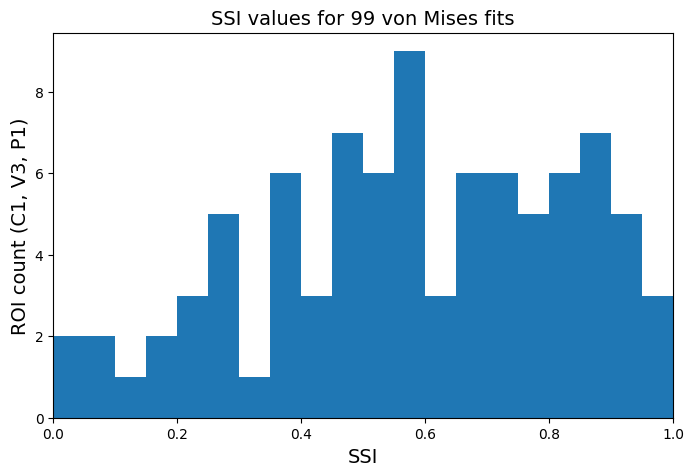

In [11]:
# Compute SSI using von Mises tuning curve fit
ssi = pd.Series(index=dgwm.index[dgwm.frac_responsive_trials >= 0.5], dtype=float)

for roi in ssi.index:
    dgw_pref_sf_idx = dgwm.at[roi, "pref_sf_idx"]
    dgw_tuning_pref_dir = dgwm.at[roi, f"vonmises_{dgw_pref_sf_idx}_pref_dir"]
    dgw_tuning_peak_amp = dgwm.at[roi, f"vonmises_{dgw_pref_sf_idx}_peak_amp"]
    
    dgf_tuning_params = [dgfm.at[roi, f"vonmises_{dgw_pref_sf_idx}_param_{i}"] for i in range(6)]
    dgf_tuning_amp_at_dgw_pref_dir = fit_utils.vonmises_two_peak_get_amplitude(dgw_tuning_pref_dir, dgf_tuning_params)

    ssi[roi] = (dgw_tuning_peak_amp - dgf_tuning_amp_at_dgw_pref_dir) / (dgw_tuning_peak_amp + dgf_tuning_amp_at_dgw_pref_dir)

fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(ssi, bins=np.arange(0, 1.05, 0.05))
ax.set_xlabel("SSI", fontsize=14)
ax.set_ylabel("ROI count (C1, V3, P1)", fontsize=14)
ax.set_title(f"SSI values for {np.count_nonzero(~ssi.isna())} von Mises fits", fontsize=14)
ax.set_xlim(0, 1)

In [12]:
# Compute the old SS metrics
ss_metrics = DriftingGratings.compute_ss_metrics_single_plane(dgf, dgw)

(-0.9640590131282807,
 1.0935266196727753,
 -0.9713584103737015,
 1.0774028622013068)

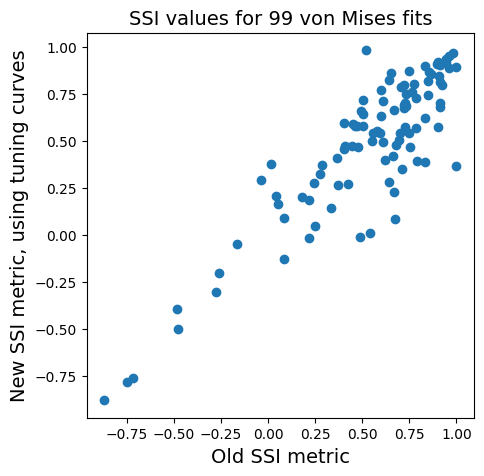

In [15]:
# Scatter plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(ss_metrics.ssi[ssi.index], ssi)
ax.set_xlabel("Old SSI metric", fontsize=14)
ax.set_ylabel("New SSI metric, using tuning curves", fontsize=14)
ax.set_title(f"SSI values for {np.count_nonzero(~ssi.isna())} von Mises fits", fontsize=14)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("equal")

### Examine the effects on all ROIs

In [16]:
metrics = pd.read_csv("/Users/chase/Desktop/MindScope/Documents/v1dd-chase/dataframes/v1dd_metrics.csv", index_col=0, low_memory=False)

# Only consider valid metrics
print(f"{np.count_nonzero(metrics.is_valid)}/{len(metrics)} ({np.mean(metrics.is_valid)*100:.1f}%) ROIs are valid")
metrics = metrics[metrics.is_valid & (metrics.mouse == 409828) & (metrics.column == 1)]

metrics.head()

9714/52826 (18.4%) ROIs are valid


,mouse,column,volume,plane,roi,is_valid,depth,dgf_pref_response,dgf_pref_dir,dgf_pref_sf,...,dgw_null_dist_single_std,dgw_resp_pref_dgf,dgf_resp_pref_dgw,ssi,ffsi,ssi_pref_both,ssi_orth,ffsi_all_dirs,spontaneous_event_mean,spontaneous_event_std
M409828_11_1_89,409828,1,1,1,89,True,50,0.000943,330.0,0.08,...,0.000450,0.000710,0.000586,0.265065,0.419054,0.033453,-0.139243,"[0.41905364, 0.61911654, 0.07141414, -0.801465...",0.000287,0.001903
M409828_11_2_0,409828,1,1,2,0,True,66,0.000919,270.0,0.08,...,0.000653,0.000394,0.000911,-0.084075,-0.183585,-0.088211,0.064530,"[-0.18358487, 0.04251838, -0.30215508, -0.1352...",0.000346,0.002629
M409828_11_2_1,409828,1,1,2,1,True,66,0.011217,0.0,0.08,...,0.000538,0.002046,0.009295,-0.065169,-0.139425,-0.157938,0.044509,"[-4.483465, -0.13942526, -0.10395071, 1.0, -1....",0.000341,0.002262
M409828_11_2_2,409828,1,1,2,2,True,66,0.001237,120.0,0.04,...,0.000582,0.000344,0.000369,0.536319,0.698187,-0.005231,-0.203358,"[-0.3096417, 0.6981869, 0.36546794, 0.25718334...",0.000341,0.002412
M409828_11_2_4,409828,1,1,2,4,True,66,0.001093,240.0,0.04,...,0.000381,0.000221,0.000660,-0.034136,-0.070685,-0.278688,-0.394162,"[-1.098053, -0.15058127, -0.28383604, -2.51381...",0.000234,0.001601


In [21]:
metrics.columns

Index(['mouse', 'column', 'volume', 'plane', 'roi', 'is_valid', 'depth',
       'dgf_pref_response', 'dgf_pref_dir', 'dgf_pref_sf', 'dgf_pref_dir_idx',
       'dgf_pref_sf_idx', 'dgf_pref_dir_mean', 'dgf_z_score', 'dgf_response_p',
       'dgf_osi', 'dgf_gosi', 'dgf_dsi', 'dgf_frac_responsive_trials',
       'dgf_lifetime_sparseness', 'dgf_p_trial_responses',
       'dgf_sig_trial_responses', 'dgf_vonmises_0_param_0',
       'dgf_vonmises_0_param_1', 'dgf_vonmises_0_param_2',
       'dgf_vonmises_0_param_3', 'dgf_vonmises_0_param_4',
       'dgf_vonmises_0_param_5', 'dgf_vonmises_0_pref_dir',
       'dgf_vonmises_0_peak_amp', 'dgf_vonmises_0_r2_score',
       'dgf_vonmises_1_param_0', 'dgf_vonmises_1_param_1',
       'dgf_vonmises_1_param_2', 'dgf_vonmises_1_param_3',
       'dgf_vonmises_1_param_4', 'dgf_vonmises_1_param_5',
       'dgf_vonmises_1_pref_dir', 'dgf_vonmises_1_peak_amp',
       'dgf_vonmises_1_r2_score', 'dgf_norm_dir_responses', 'dgf_pref_ori',
       'dgf_chisq_respons

In [56]:
rois = metrics.index[metrics.dgw_frac_responsive_trials >= 0.5]
ssi_new = pd.Series(index=rois, dtype=float)
si_new = pd.Series(index=rois, dtype=float)
r2_scores = pd.Series(index=rois, dtype=float)

for roi in rois:
    dgw_pref_sf_idx = int(metrics.at[roi, "dgw_pref_sf_idx"])
    dgw_tuning_pref_dir = metrics.at[roi, f"dgw_vonmises_{dgw_pref_sf_idx}_pref_dir"]
    dgw_tuning_peak_amp = metrics.at[roi, f"dgw_vonmises_{dgw_pref_sf_idx}_peak_amp"]

    dgf_tuning_params = [metrics.at[roi, f"dgf_vonmises_{dgw_pref_sf_idx}_param_{i}"] for i in range(6)]
    dgf_tuning_amp_at_dgw_pref_dir = fit_utils.vonmises_two_peak_get_amplitude(dgw_tuning_pref_dir, dgf_tuning_params)
    ssi_new[roi] = (dgw_tuning_peak_amp - dgf_tuning_amp_at_dgw_pref_dir) / (dgw_tuning_peak_amp + dgf_tuning_amp_at_dgw_pref_dir)
    si_new[roi] = (dgw_tuning_peak_amp - dgf_tuning_amp_at_dgw_pref_dir) / dgw_tuning_peak_amp

    r2_scores[roi] = metrics.at[roi, f"dgw_vonmises_{dgw_pref_sf_idx}_r2_score"]

In [57]:
# Valid metrics (i.e., ones that have a valid fitted tuning curve)
valid_idx = ssi_new.index[~ssi_new.isna()]

(0.0, 1.0)

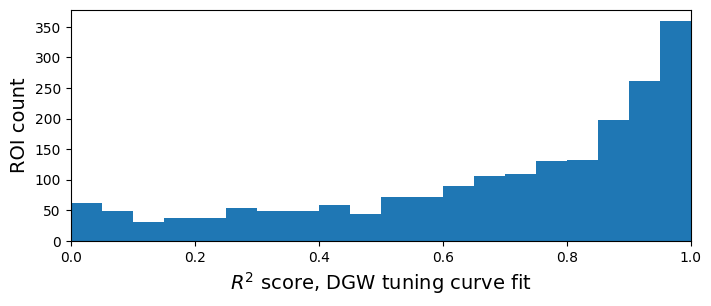

In [62]:
# Histogram of R^2 scores
fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(r2_scores[valid_idx], bins=np.arange(0, 1.05, 0.05))
ax.set_xlabel("$R^2$ score, DGW tuning curve fit", fontsize=14)
ax.set_ylabel("ROI count", fontsize=14)
# ax.set_title(f"{len(valid_idx)} von Mises fits", fontsize=14)
ax.set_xlim(0, 1)

(-1.0, 1.0)

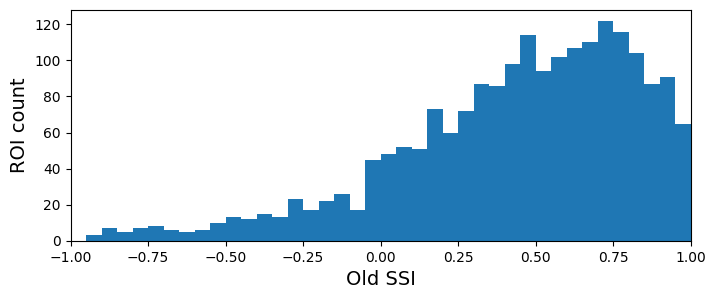

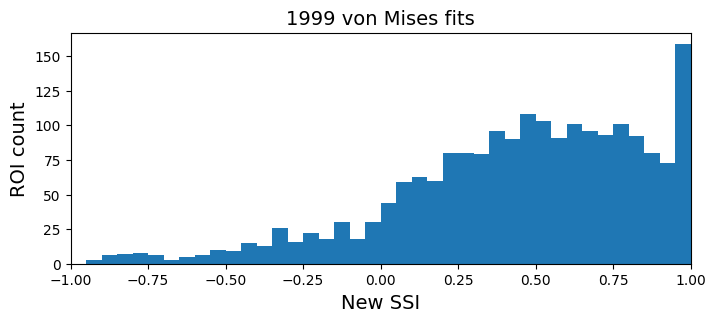

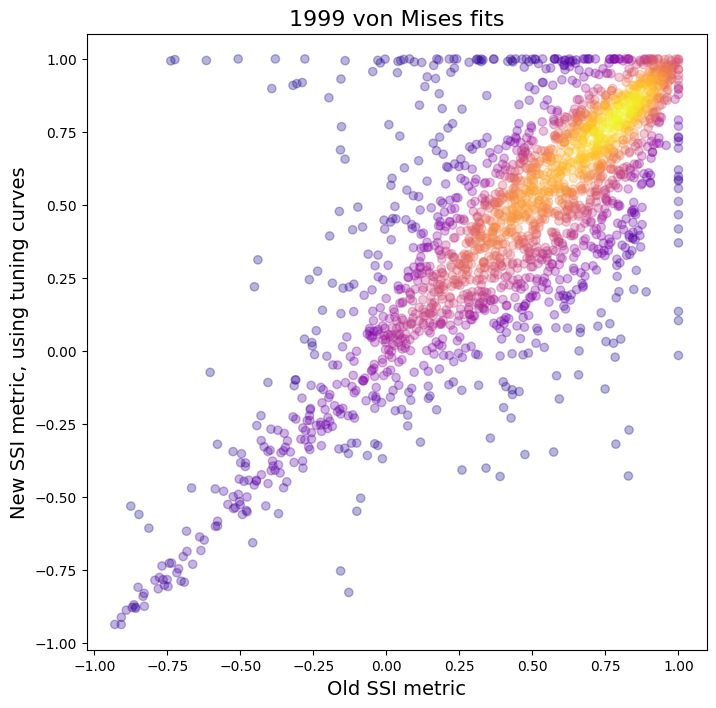

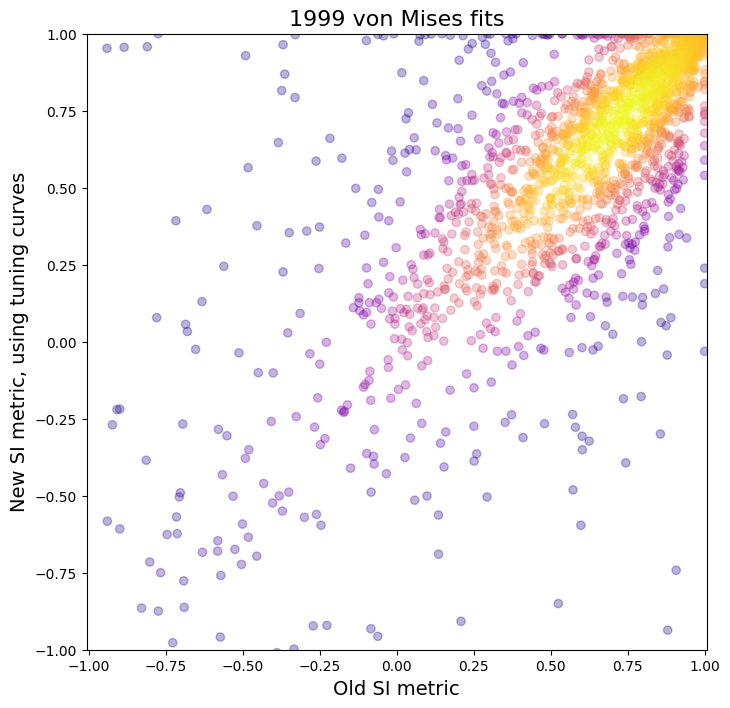

In [65]:
fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(metrics.ssi[valid_idx], bins=np.arange(-1, 1.05, 0.05))
ax.set_xlabel("Old SSI", fontsize=14)
ax.set_ylabel("ROI count", fontsize=14)
# ax.set_title(f"{len(valid_idx)} von Mises fits", fontsize=14)
ax.set_xlim(-1, 1)

fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(ssi_new[valid_idx], bins=np.arange(-1, 1.05, 0.05))
ax.set_xlabel("New SSI", fontsize=14)
ax.set_ylabel("ROI count", fontsize=14)
ax.set_title(f"{len(valid_idx)} von Mises fits", fontsize=14)
ax.set_xlim(-1, 1)

at.density_scatter(
    metrics.ssi[valid_idx], ssi_new[valid_idx],
    figsize=(8, 8),
    xlabel="Old SSI metric",
    ylabel="New SSI metric, using tuning curves",
    title=f"{len(valid_idx)} von Mises fits",
    alpha=0.3
).axis("equal")

ax = at.density_scatter(
    metrics.ffsi[valid_idx], si_new[valid_idx],
    figsize=(8, 8),
    xlabel="Old SI metric",
    ylabel="New SI metric, using tuning curves",
    title=f"{len(valid_idx)} von Mises fits",
    alpha=0.3
)
ax.axis("equal")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

(-1.0, 1.0)

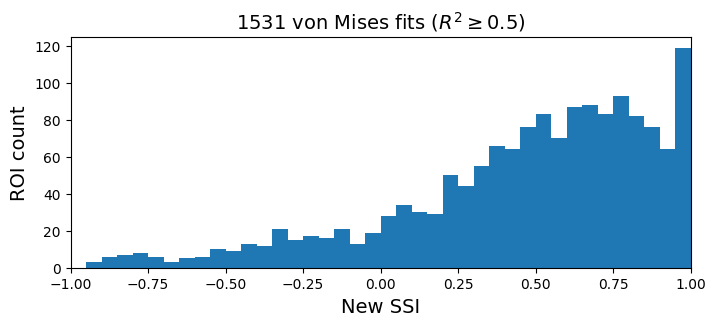

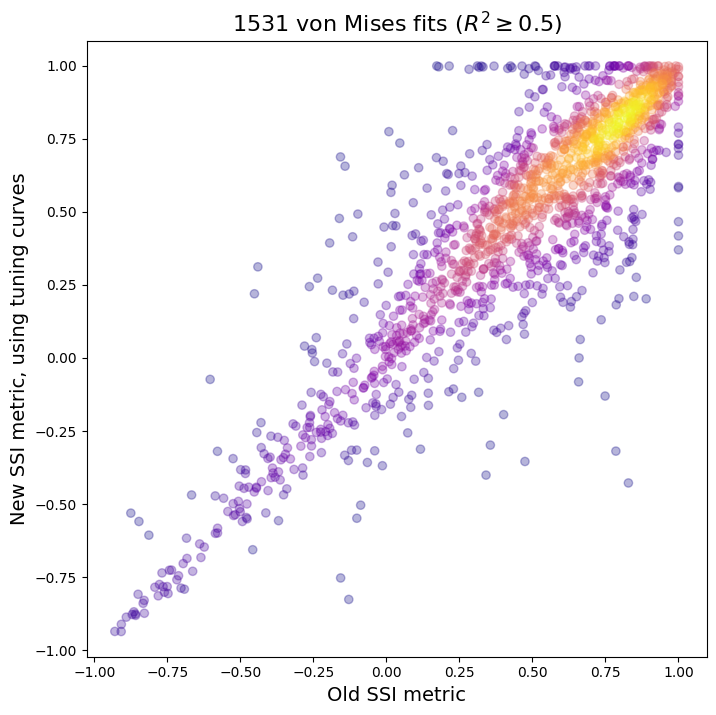

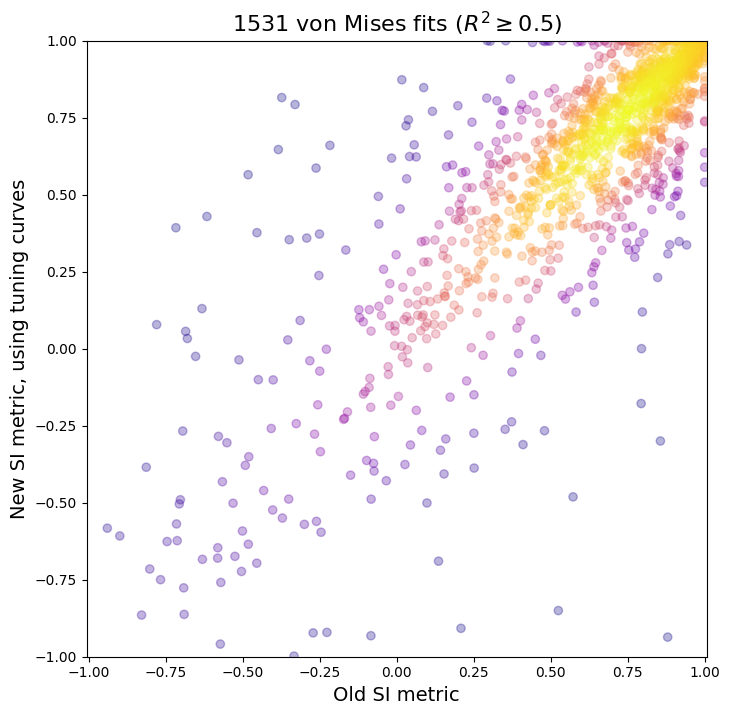

In [66]:
valid_idx_r2 = valid_idx = ssi_new.index[~ssi_new.isna() & (r2_scores >= 0.5)]

fig, ax = plt.subplots(figsize=(8, 3))
ax.hist(ssi_new[valid_idx_r2], bins=np.arange(-1, 1.05, 0.05))
ax.set_xlabel("New SSI", fontsize=14)
ax.set_ylabel("ROI count", fontsize=14)
ax.set_title(f"{len(valid_idx_r2)} von Mises fits ($R^2 \geq 0.5$)", fontsize=14)
ax.set_xlim(-1, 1)

at.density_scatter(
    metrics.ssi[valid_idx_r2], ssi_new[valid_idx_r2],
    figsize=(8, 8),
    xlabel="Old SSI metric",
    ylabel="New SSI metric, using tuning curves",
    title=f"{len(valid_idx_r2)} von Mises fits ($R^2 \geq 0.5$)",
    alpha=0.3
).axis("equal")

ax = at.density_scatter(
    metrics.ffsi[valid_idx_r2], si_new[valid_idx_r2],
    figsize=(8, 8),
    xlabel="Old SI metric",
    ylabel="New SI metric, using tuning curves",
    title=f"{len(valid_idx_r2)} von Mises fits ($R^2 \geq 0.5$)",
    alpha=0.3
)
ax.axis("equal")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

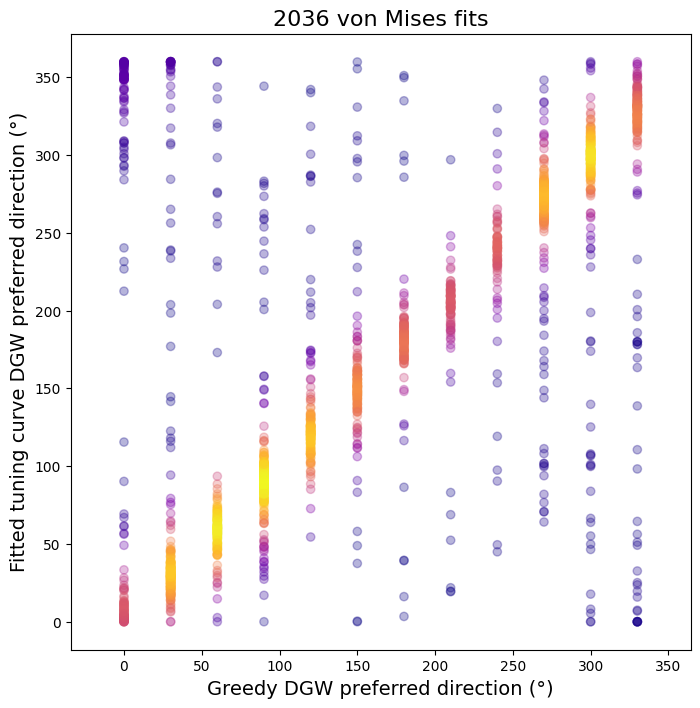

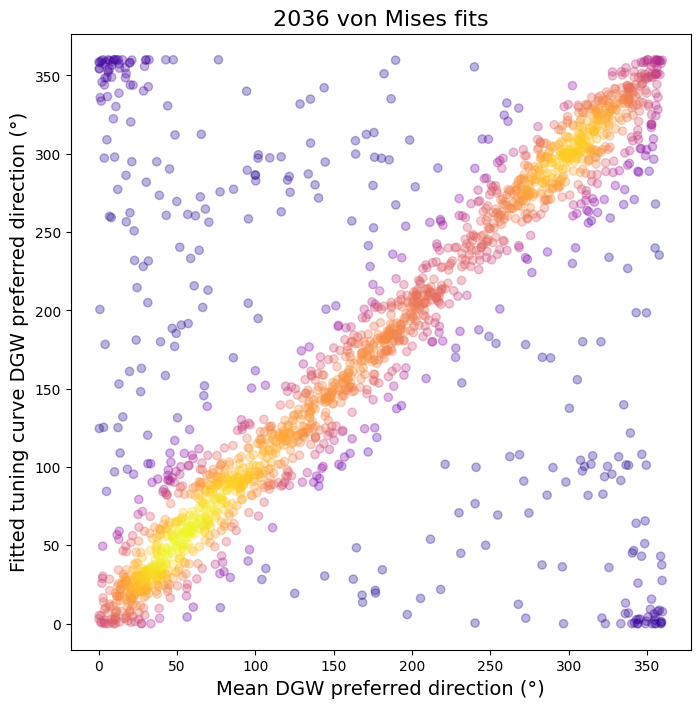

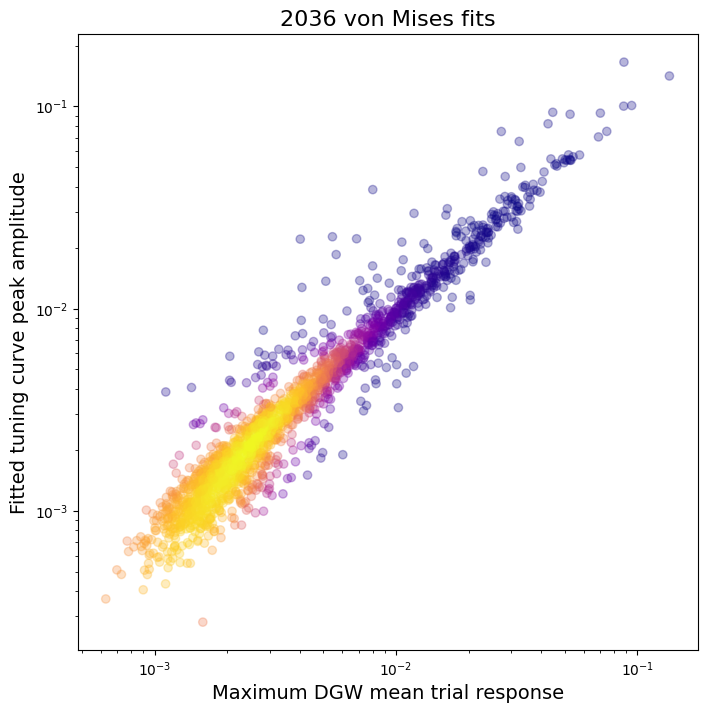

In [69]:
tuning_pref_dir = pd.Series(index=rois, dtype=float)
tuning_peak_amp = pd.Series(index=rois, dtype=float)

for roi in rois:
    dgw_pref_sf_idx = int(metrics.at[roi, "dgw_pref_sf_idx"])
    tuning_pref_dir[roi] = metrics.at[roi, f"dgw_vonmises_{dgw_pref_sf_idx}_pref_dir"]
    tuning_peak_amp[roi] = metrics.at[roi, f"dgw_vonmises_{dgw_pref_sf_idx}_peak_amp"]

valid_idx = tuning_pref_dir.index[~tuning_pref_dir.isna()]

at.density_scatter(
    metrics.dgw_pref_dir[valid_idx], tuning_pref_dir[valid_idx],
    figsize=(8, 8),
    xlabel="Greedy DGW preferred direction (°)",
    ylabel="Fitted tuning curve DGW preferred direction (°)",
    title=f"{len(valid_idx)} von Mises fits",
    alpha=0.3
).axis("equal")

at.density_scatter(
    metrics.dgw_pref_dir_mean[valid_idx], tuning_pref_dir[valid_idx],
    figsize=(8, 8),
    xlabel="Mean DGW preferred direction (°)",
    ylabel="Fitted tuning curve DGW preferred direction (°)",
    title=f"{len(valid_idx)} von Mises fits",
    alpha=0.3
).axis("equal")

ax = at.density_scatter(
    metrics.dgw_pref_response[valid_idx], tuning_peak_amp[valid_idx],
    figsize=(8, 8),
    xlabel="Maximum DGW mean trial response",
    ylabel="Fitted tuning curve peak amplitude",
    title=f"{len(valid_idx)} von Mises fits",
    alpha=0.3
)
ax.set_xscale("log")
ax.set_yscale("log")

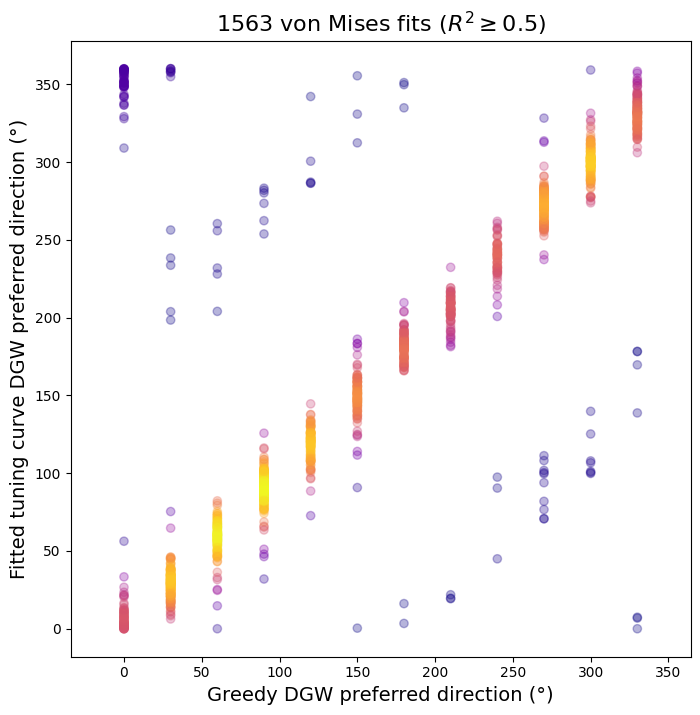

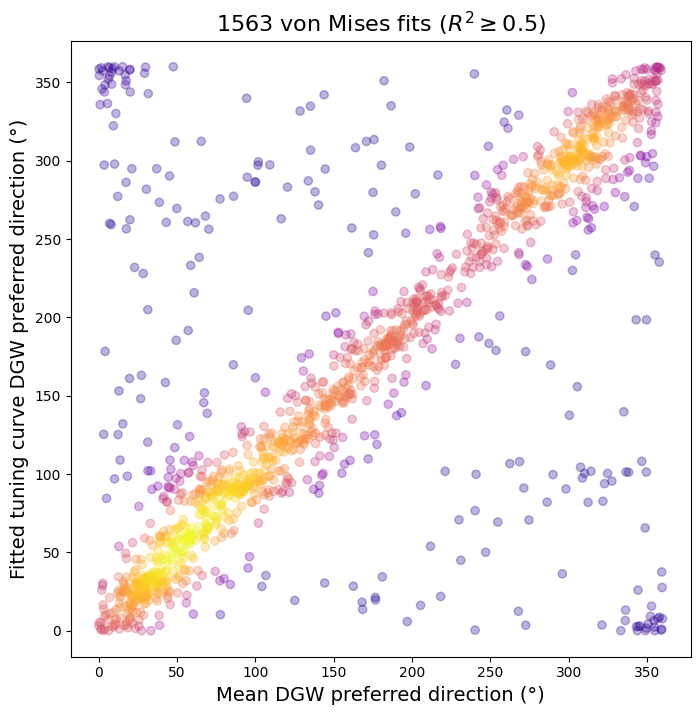

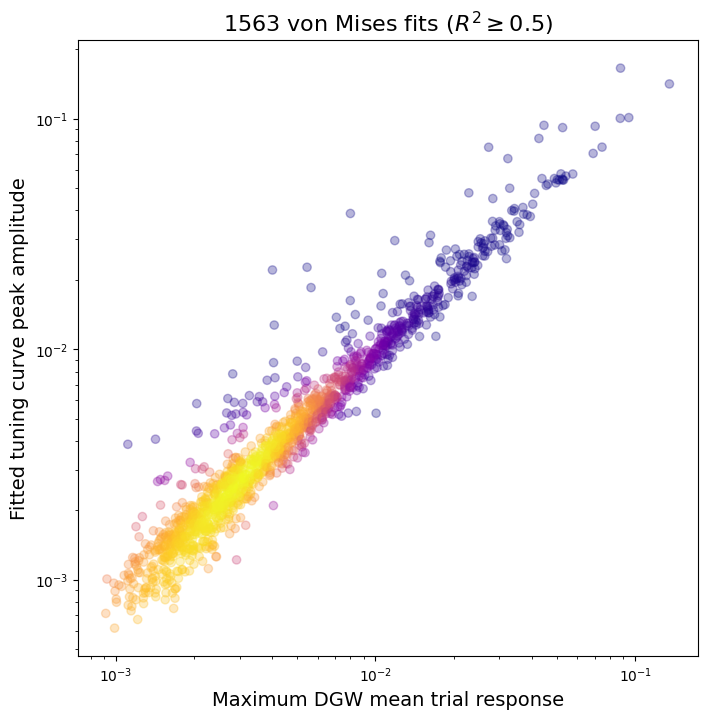

In [68]:
tuning_pref_dir = pd.Series(index=rois, dtype=float)
tuning_peak_amp = pd.Series(index=rois, dtype=float)

for roi in rois:
    dgw_pref_sf_idx = int(metrics.at[roi, "dgw_pref_sf_idx"])
    tuning_pref_dir[roi] = metrics.at[roi, f"dgw_vonmises_{dgw_pref_sf_idx}_pref_dir"]
    tuning_peak_amp[roi] = metrics.at[roi, f"dgw_vonmises_{dgw_pref_sf_idx}_peak_amp"]

valid_idx_r2 = tuning_pref_dir.index[~tuning_pref_dir.isna() & (r2_scores >= 0.5)]

at.density_scatter(
    metrics.dgw_pref_dir[valid_idx_r2], tuning_pref_dir[valid_idx_r2],
    figsize=(8, 8),
    xlabel="Greedy DGW preferred direction (°)",
    ylabel="Fitted tuning curve DGW preferred direction (°)",
    title=f"{len(valid_idx_r2)} von Mises fits ($R^2 \geq 0.5$)",
    alpha=0.3
).axis("equal")

at.density_scatter(
    metrics.dgw_pref_dir_mean[valid_idx_r2], tuning_pref_dir[valid_idx_r2],
    figsize=(8, 8),
    xlabel="Mean DGW preferred direction (°)",
    ylabel="Fitted tuning curve DGW preferred direction (°)",
    title=f"{len(valid_idx_r2)} von Mises fits ($R^2 \geq 0.5$)",
    alpha=0.3
).axis("equal")

ax = at.density_scatter(
    metrics.dgw_pref_response[valid_idx], tuning_peak_amp[valid_idx],
    figsize=(8, 8),
    xlabel="Maximum DGW mean trial response",
    ylabel="Fitted tuning curve peak amplitude",
    title=f"{len(valid_idx_r2)} von Mises fits ($R^2 \geq 0.5$)",
    alpha=0.3
)
ax.set_xscale("log")
ax.set_yscale("log")